### Rdkit

This is a short overview of reading, creating smiles from different file types and writing molecules to various file formats

In [1]:
import os 
import pandas as pd
import numpy as np 
import rdkit
from rdkit import Chem #This gives us most of RDkits's functionality
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
IPythonConsole.ipython_useSVG=True  #SVG's tend to look nicer than the png counterparts
print(rdkit.__version__)

# Mute all errors except critical
Chem.WrapLogs()
lg = rdkit.RDLogger.logger() 
lg.setLevel(rdkit.RDLogger.CRITICAL)

2021.09.2


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# High DPI rendering for mac
%config InlineBackend.figure_format = 'retina'

# Plot matplotlib plots with white background: 
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

plot_params = {
'font.size' : 15,
'axes.titlesize' : 15,
'axes.labelsize' : 15,
'axes.labelweight' : 'bold',
'xtick.labelsize' : 12,
'ytick.labelsize' : 12,
}
 
plt.rcParams.update(plot_params)

### Convet smile to mol

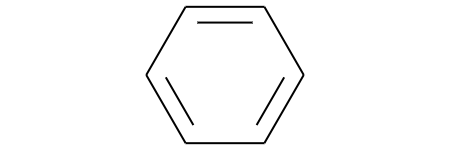

In [7]:
mol = Chem.MolFromSmiles("c1ccccc1")
mol


In [6]:
type(mol)

rdkit.Chem.rdchem.Mol

By default SMILES (atleast the ones we deal with RDkit) accounts H atoms connected with C atoms implicitly based on the valence of the bond. You can add H explicitly using the command below:

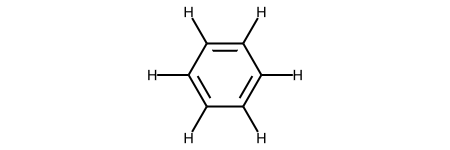

In [10]:
Chem.AddHs(mol)

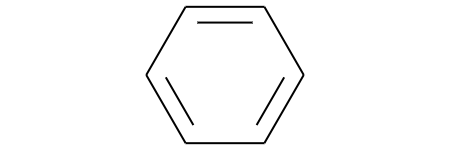

In [11]:
# remove H
Chem.RemoveHs(mol)

In [12]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(mol)

# Descriptors for molecules

We can find more information about the molecule using rdkit.Chem.Descriptors

In [14]:
from rdkit.Chem import Descriptors
mol_wt = Descriptors.ExactMolWt(mol)
print('Mol Wt: {:0.3f}'.format(mol_wt))

Mol Wt: 78.047


In [15]:
heavy_mol_wt = Descriptors.HeavyAtomMolWt(mol)
print('Heavy Mol Wt: {:0.3f}'.format(heavy_mol_wt))

Heavy Mol Wt: 72.066


In [16]:
ring_count = Descriptors.RingCount(mol)
print('Number of rings: {:0.3f}'.format(ring_count))

Number of rings: 1.000


In [17]:
rotatable_bonds = Descriptors.NumRotatableBonds(mol)
print('Number of rotatable bonds: {:0.3f}'.format(rotatable_bonds))

Number of rotatable bonds: 0.000


In [18]:
num_aromatic_rings = Descriptors.NumAromaticRings(mol)
print('Number of aromatic rings: {:0.3f}'.format(num_aromatic_rings))

Number of aromatic rings: 1.000


Get some more information about the molecule:

MolToMolBlock: To get Coordinates and bonding details for the molecule

In [20]:
mol_block = Chem.MolToMolBlock(mol)
print(mol_block)


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  2  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  4  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



# Molecule drawing

In [21]:
from collections import defaultdict
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

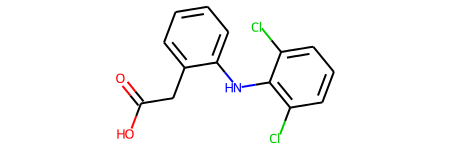

In [22]:
diclofenac = Chem.MolFromSmiles('O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
diclofenac

Substructure highlights: Let's look at the the C=O and the -NH species in the molecule

In [23]:
sub_pattern = Chem.MolFromSmarts('O=CCccN')
hit_ats = list(diclofenac.GetSubstructMatch(sub_pattern))
hit_bonds = []

for bond in sub_pattern.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    
    hit_bonds.append( diclofenac.GetBondBetweenAtoms(aid1, aid2).GetIdx() )

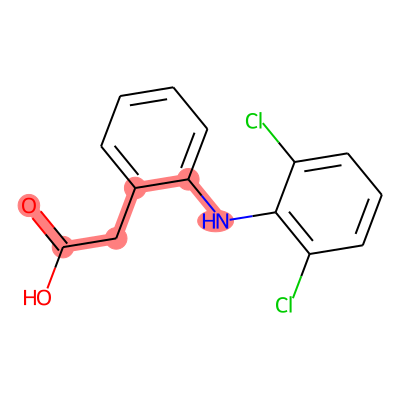

In [24]:
d2d = rdMolDraw2D.MolDraw2DSVG(400, 400) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d2d, diclofenac, highlightAtoms=hit_ats,  highlightBonds=hit_bonds)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [25]:
rings = diclofenac.GetRingInfo()
type(rings)

rdkit.Chem.rdchem.RingInfo

In [26]:
colors = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

athighlights = defaultdict(list)
arads = {}

for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        bndhighlights[bid].append(colors[i])

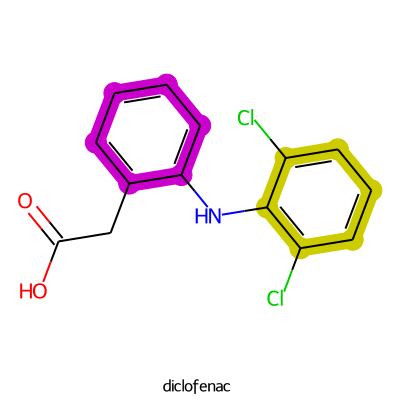

In [27]:
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(diclofenac,'diclofenac',dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())